#Least Square Regression
Case 1: Single Independent variable.

Case 2: Multiple Independent Variables.

**Case 1**

In [1]:
# Importing the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt

(0.0, 16.0)

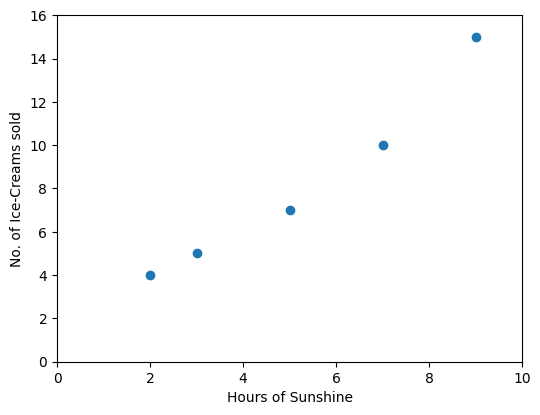

In [2]:
# Defining the inpit vectors
x1 = np.array([2, 3, 5, 7, 9]) # Hours of sunshine
b = np.array([4,5,7,10,15]) # y = No. of icecreams sold

# Plotting the data
plt.figure(figsize=(6,4.5))
plt.scatter(x1, b)
plt.xlabel('Hours of Sunshine')
plt.ylabel('No. of Ice-Creams sold')
plt.xlim(0,10)
plt.ylim(0,16)

Since there is no line that passes exactly through all these lines, we can not find the perfect model that fits all the points.

However we can find  least square solution.    

 **NORMAL FORM:  A'Ax' = A'b**

In [4]:
s1 = np.matmul(np.transpose(x1),b)
print(s1)

s2 = np.matmul(np.transpose(x1),x1)
print(s2)

263
168


In [3]:
# Let us create a vectorv of ones of size (5)
ones = np.ones(5).astype('int')
print('Ones: ', ones)

# Let us create the A matrix
A = np.column_stack((x1, ones))
print('Matrix A is: \n', A)

Ones:  [1 1 1 1 1]
Matrix A is: 
 [[2 1]
 [3 1]
 [5 1]
 [7 1]
 [9 1]]


In [4]:
# Let us solve for the normal form:
A_transpose_A = np.matmul(np.transpose(A), A)
print(f'Value of A"A is:\n {A_transpose_A}' )

A_transpose_b = np.matmul(np.transpose(A), b)
print(f'Value of A"b is:\n {A_transpose_b}' )

Value of A"A is:
 [[168  26]
 [ 26   5]]
Value of A"b is:
 [263  41]


In [5]:
# Let us solve the above least square regression system using np.linalg.solve:
lss = np.linalg.solve(A_transpose_A, A_transpose_b) # lss ----> least squared solution
slope = lss[0]
intercept = lss[1]
print(f'Model Parameters: \nSlope = {slope} \nIntercept = {intercept}')

Model Parameters: 
Slope = 1.51829268292683 
Intercept = 0.30487804878048397


In [6]:
x = np.linspace(0,10,10)
model = slope*x + intercept

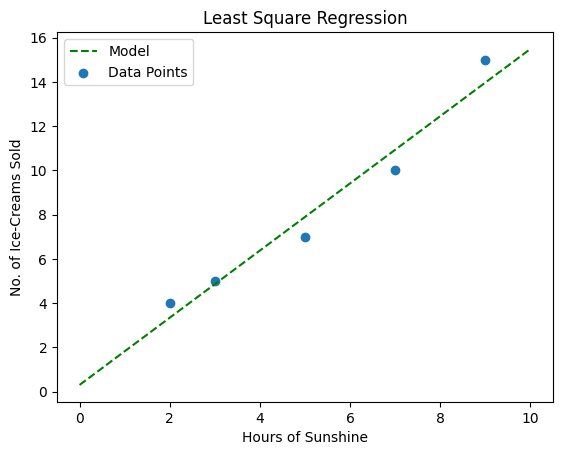

In [7]:
# Plotting the model and the actual data-points
plt.plot(x, model, linestyle = '--', color = 'green', label = 'Model')
plt.scatter(x1, b, label = 'Data Points')
plt.xlabel('Hours of Sunshine')
plt.ylabel('No. of Ice-Creams Sold')
plt.title('Least Square Regression')
plt.legend()

#Model:
**y = 1.518x + 0.305**

No. of Ice-creams sold = C1*Hours of sunshine + C2

#Case 2
The Data set consists of 2 independent variables and 1 dependent variable.

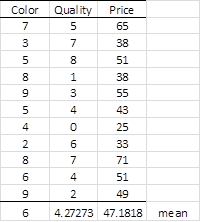

Text(0.5, 0, 'Price')

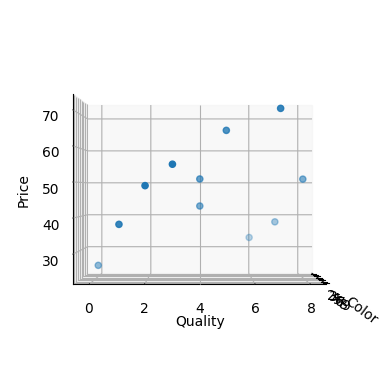

In [8]:
# Defining the independent vectors:
color = np.array([7, 3, 5, 8, 9, 5, 4, 2, 8, 6, 9])
quality = np.array([5, 7, 8, 1, 3, 4, 0, 6, 7, 4, 2])
b = np.array([65, 38, 51, 38, 55, 43, 25, 33, 71, 51, 49])

# Plotting the 3D plot:
from mpl_toolkits import mplot3d

# Create a 3D scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(color, quality, b)

# Rotate the plot interactively
ax.view_init(elev=0, azim=0) #(elv, azim) = (0, 0) --> price vs quality  (0, 90) ---> color vs price

# Set labels and title
ax.set_xlabel('Color')
ax.set_ylabel('Quality')
ax.set_zlabel('Price')

*The goal is to write

Price = C1(Color) + C2(Quality) + C3  

Even if Price (b) does not lie in the column space of [Color, Quality] (A), the goal is to find C1, C2, C3 such that sum of the squares of the errors is minimized.

In [9]:
# Developing the A matrix:
ones = np.ones(len(color))
A = np.column_stack((color, quality, ones))
print(A)

[[7. 5. 1.]
 [3. 7. 1.]
 [5. 8. 1.]
 [8. 1. 1.]
 [9. 3. 1.]
 [5. 4. 1.]
 [4. 0. 1.]
 [2. 6. 1.]
 [8. 7. 1.]
 [6. 4. 1.]
 [9. 2. 1.]]


In [10]:
# Normal form: A*Ax' = A*b,   A* is A transpose.
A_transpose_A = np.matmul(np.transpose(A), A)
print(f'Value of A"A is:\n {A_transpose_A}' )
print()
A_transpose_b = np.matmul(np.transpose(A), b)
print(f'Value of A"b is:\n {A_transpose_b}' )
print()
print()

lss = np.linalg.solve(A_transpose_A, A_transpose_b)
c1 = lss[0]
c2 = lss[1]
intercept = lss[2]
print(f'Model Parameters: \nSlope w.r.t Color = {c1} \nSlope w.r.t Quality = {c2} \nIntercept = {intercept}')

Value of A"A is:
 [[454. 261.  66.]
 [261. 269.  47.]
 [ 66.  47.  11.]]

Value of A"b is:
 [3319. 2371.  519.]


Model Parameters: 
Slope w.r.t Color = 4.895288364511376 
Slope w.r.t Quality = 3.75841548293617 
Intercept = 1.7514036585681045


In [33]:
# Plotting the model against the given datapoints:
prediction = np.matmul(A,lss) # Model predicted values for given vectors color and quality

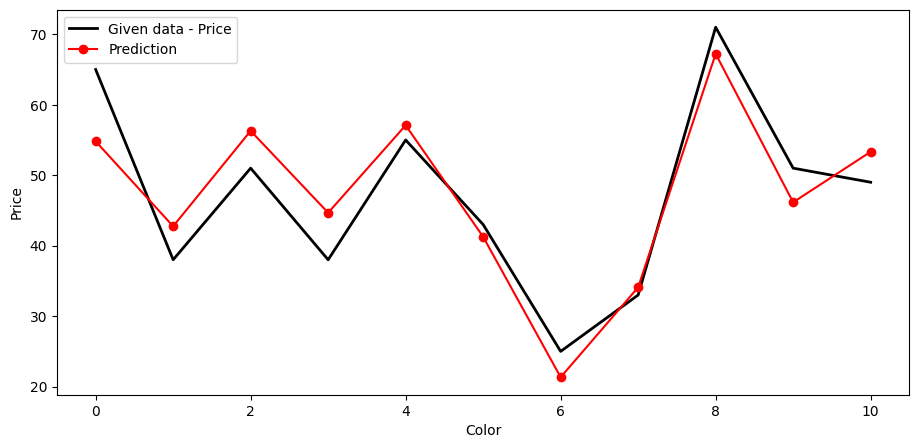

In [39]:
# Plotting the prediction made by model vs Given data
fig = plt.figure(figsize=(11, 5))

plt.plot(b, color = 'k', linewidth = 2, label = 'Given data - Price')
plt.plot(prediction,'-o', color = 'r', linewidth = 1.5, label = 'Prediction')
plt.xlabel('Color')
plt.ylabel('Price')
plt.legend()
